In [1]:
# Parameters
survey = "gama"


In [2]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [4]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [5]:
survey  = 'gama'
version = 'latest'
dryrun = False

In [6]:
fpath = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
123281,587724649255010654,175.33684943,-2.47765272,18.508278,0.07775,4,G12_Y6_051_026,6,20.005444,19.001768,18.43343,18.128056,17.895376,247.47013288954915,36.967613957681905,G12,-228.64338173556078,18.64987105624686,-9.926295790157884,228.46859526203986,-20.569740887948782,-10.15538225743375,0.5683384,18.508278,0.5947095088397611,0,4,-0.12145210218178723,-0.14782321685650926,0.09386676219384957,0.1144879373509757,0.5477172190079129,2.12,-0.075417496,-0.16482998,-18.477785330545366,-18.388372842502058,-18.553202826809347,36.98606322361177,36.896650735568464,-0.12191415624145123,-0.14852937903794905,0.09481072212074988,0.11664591067571423,-18.47872929047227,1.2917213,0.1405274458084947,0.0,-6.508278,0.003980023594705244,0.0
508557,587729971786940946,217.19946129,-1.5769885,19.355307,0.05606,4,G15_Y2_003_140,6,21.191936,20.02943,19.494352,19.263758,18.98756,175.59008312472253,36.22249992214916,G15,-132.38905442382938,-100.48679980208547,-4.57575189376695,133.2237844640646,99.37123117196604,-4.709335360060893,0.53507805,19.355307,0.5782485855455651,0,4,-0.14054202778484734,-0.18371256462435775,0.07198516985644665,0.07291179564533268,0.5341514229171687,2.12,-0.054378204,-0.1188472,-16.884800262591718,-16.820331267855046,-16.939178466639397,36.24010688795793,36.17563789322126,-0.14307149449320722,-0.18780013889648303,0.0736533838689939,0.07737515081718024,-16.886468476604264,0.4446926,0.06861931872909628,0.0,-7.3553066,0.0019354033587702987,0.0
278187,587726031189836412,214.37299238,1.09355577,19.774502,0.15595,4,G15_Y4_232_353,5,20.959604,20.024252,19.66941,19.422945,19.348568,523.9983853005301,38.59664974354315,G15,-374.0809586860361,-255.8796604306829,8.651329521932924,376.2255507132008,252.7284789081164,8.274099070057625,0.35484123,19.774502,0.2744785820574246,0,2,-0.12126437671598772,-0.04090172647360765,0.04493669967820002,0.12009801309513066,0.279679918882874,2.12,-0.15127149,-0.33061397,-18.71581315044143,-18.536470671927713,-18.867084642684244,38.490314950978544,38.310972472464826,-0.06760715201130102,0.02781821076256147,0.1491177263509001,0.29299350047622474,-18.819994177114133,0.025497437,0.1579620420584881,0.0,-7.774502,0.004260256333032649,0.0
279688,587726031693611569,138.75098304,1.00368548,19.595543,0.22079,4,G09_Y3_019_335,5,21.959982,20.51256,19.575455,19.184067,18.88176,772.8098224309778,39.44036316667786,G9,-475.87936380472416,417.32055725469064,11.088797612929003,472.3681041336928,-421.3030622273456,10.615167924119861,0.9371052,19.595543,0.6781044179507406,0,4,-0.011684348380550533,0.2473164125017167,0.21020627338842263,0.5403093953042624,0.6070020569171681,2.12,-0.2141663,-0.46807477,-19.840860233842797,-19.58695176356978,-20.05502653235144,39.43640314155764,39.18249467128462,-0.03474891025200881,0.20273170312397315,0.1819759681101923,0.4679069928376364,-19.812629928564565,0.20445633,0.24282635034278316,0.0,-7.595543,0.006902439146092

In [7]:
fpath = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,DDPMALL_0P0_VISZ,FIELD,VMAX,VZ
,,,mag,,,,
float32,float64,float64,float64,float64,bytes3,float64,float64
0.07775,0.03903000056743622,0.1405274458084947,-18.388372842502058,-17.1836360612024,G12,1229028.6336226421,192634.61521107034
0.05606,0.03903000056743622,0.06861931872909628,-16.820331267855046,-16.433156214909655,G15,124301.68321847978,55377.53696164946
0.15595,0.03903000056743622,0.1579620420584881,-18.536470671927713,-18.793359517282955,G15,1738362.4625245912,1673832.8985113946
0.22079,0.03903000056743622,0.24282635034278316,-19.58695176356978,-19.608012263873803,G9,6052015.60786606,4607980.002333049
0.11458,0.03903000056743622,0.20004425040188942,-19.13298043380075,-18.07713914432092,G15,3466141.89457807,664025.6291286683
0.21654,0.03903000056743622,0.24933107583550496,-20.032415909713364,-19.561833913510945,G9,6526019.055487716,4357335.38176644
0.19101,0.03903000056743622,0.22014528332254174,-19.29459927768612,-19.267592612289832,G9,4569391.23895289,3031266.6305087632
0.20403,0.03903000056743622,0.26298999786376953,-19.972380821618955,-19.421818615577166,G9,7594841.612883208,3669797.831405484


Text(0.5, 0, 'ZMAX')

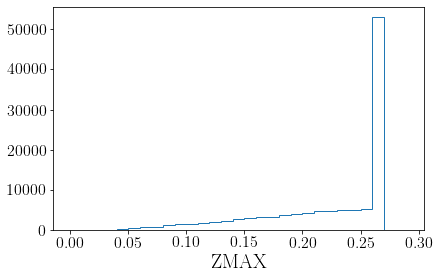

In [8]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [9]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, '$z_{\\rm max}$')

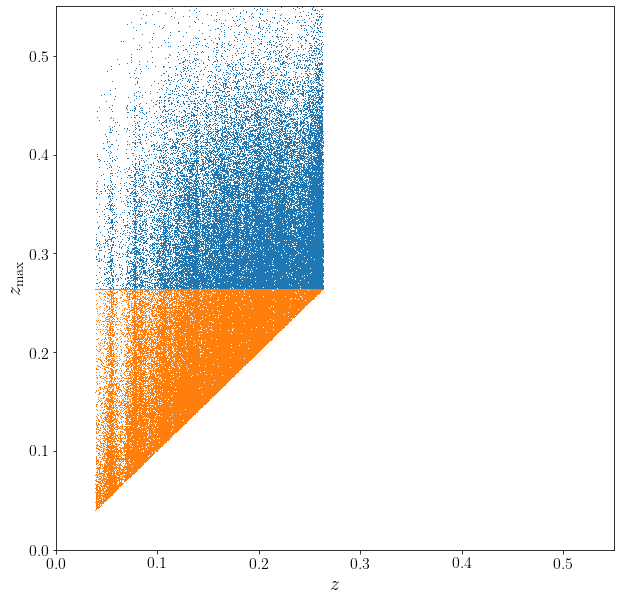

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

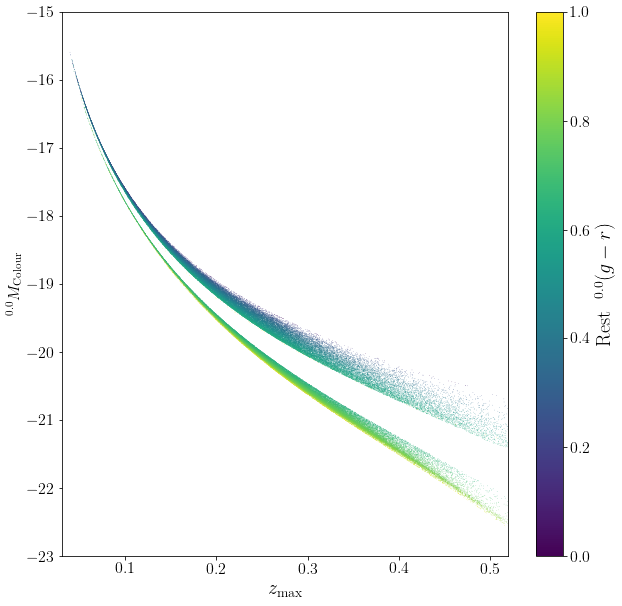

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

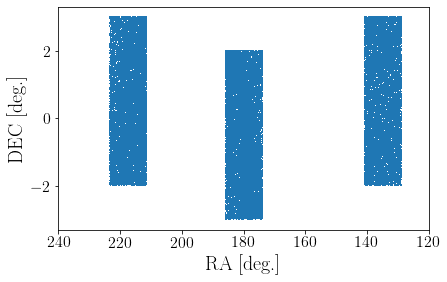

In [12]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [13]:
fpath = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,--
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-25.0,0.0,0.0,0.0,0.0,0.0,--
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,--
-24.6,0.0,0.0,0.0,0.0,0.0,--
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,--
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,--
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,--
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_158345/3573005910.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
/tmp/ipykernel_158345/3573005910.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)


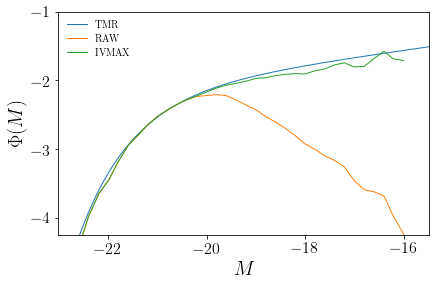

In [14]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR', lw=1.)

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='RAW', lw=1.)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX', lw=1.)

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '$V/V_{Max}$')

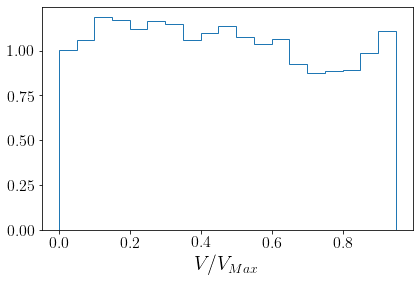

In [15]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

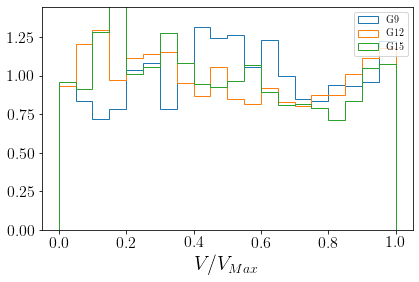

In [16]:
fields = ['G9', 'G12', 'G15']
for field in fields:
    field_vmax = gama_vmax[gama_vmax['FIELD'] == field]
    _ = pl.hist(field_vmax['VZ'] / field_vmax['VMAX'], bins=np.arange(0.0, 1.001, 0.05), histtype='step', density=True, label=field)

pl.legend()
pl.xlabel('$V/V_{Max}$')
pl.ylim(0, 1.45)
pl.show()


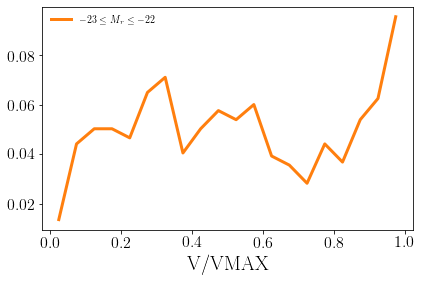

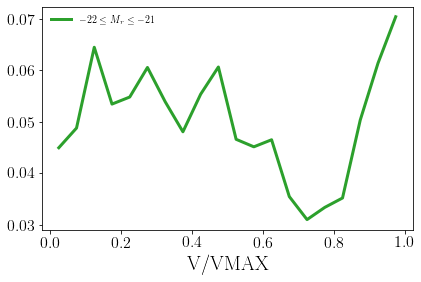

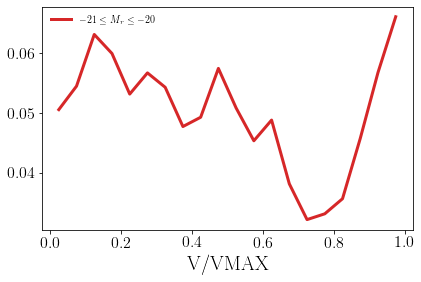

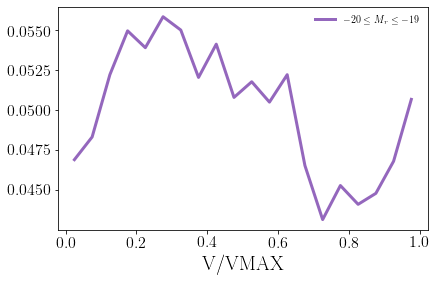

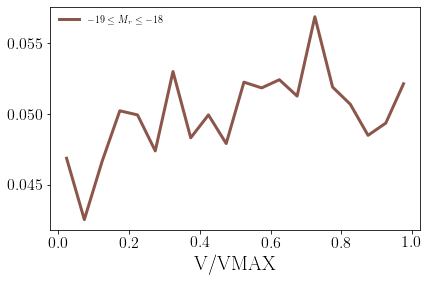

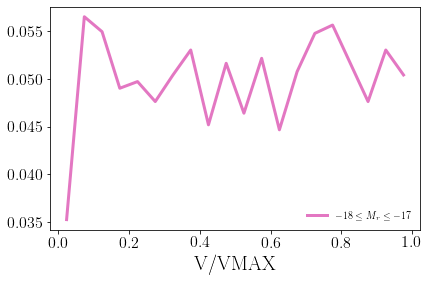

In [17]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [18]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,G12,-239.97727236461046,0.6935893874232879,-6.905119636685518,239.95593630894075,-2.7092935591663565,-7.1457227418616585,0.7871351,14.160493,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,-23.01412754054145,37.09571093614177,37.10954043562488,-0.11872379703855176,-0.14155580081515584,0.09800108132364935,0.12361948889850743,-22.930188228466623,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,G12,-314.6983622428863,-11.998751500068654,-11.395465440223349,314.7764615969768,9.35496746422525,-11.711092038957487,1.0383816,14.328211,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,-23.528504033267527,37.75259506392482,37.770842862010035,-0.09801980357535564,-0.0876437071781144,0.11870507478684547,0.17753158253554888,-23.400249615659654,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.9591792306916,39.76386339337955,G12,-713.9407537359408,-52.154217318169536,-33.75421886554996,714.3194415688174,46.155514435440104,-34.47047148430874,1.4456768,14.425353,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,-25.687145139771815,39.868426780897494,39.911202188331,-0.018670125386448577,0.29021962938141105,0.19805475297575253,0.5553949190950743,-25.292493687017117,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.9712644440074,37.212173568413235,G15,-202.7981329939006,-154.36433581903054,5.717037181843526,204.09321717251248,152.65545385094066,5.512399344915336,0.039456367,14.456577,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,-22.818599066841177,37.19130046586948,37.09185997317987,-0.11433057873334761,-0.13142393692472373,0.1023942996288535,0.13375135278893954,-22.774114665019606,5.343422,1.1327446851177603,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,

In [19]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.